In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.shape

(918, 12)

In [12]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

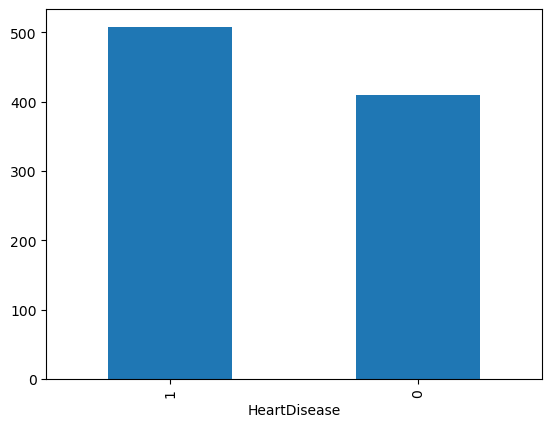

In [18]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [19]:
df.rename(columns={'HeartDisease': 'is_patient'}, inplace=True)

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,is_patient
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


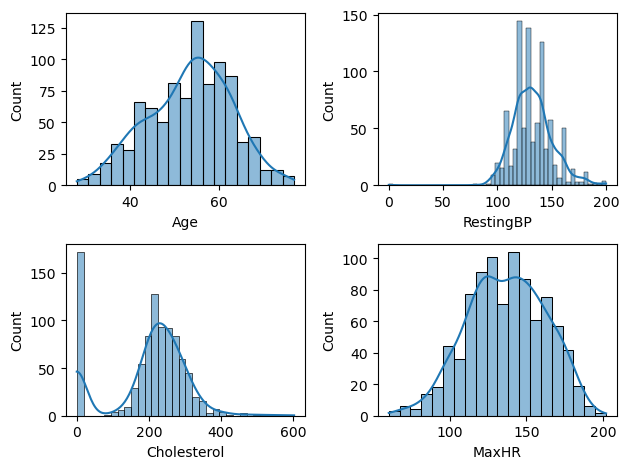

In [26]:
def plots(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plots('Age',1)
plots('RestingBP',2)
plots('Cholesterol',3)
plots('MaxHR',4)

plt.tight_layout()


In [39]:
rest_mean = df.loc[df['RestingBP'] != 0,'RestingBP'].mean()
rest_mean
df['RestingBP'] = df['RestingBP'].replace(0, rest_mean)
df['RestingBP'].round(2)

0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64

In [46]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol' ].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)

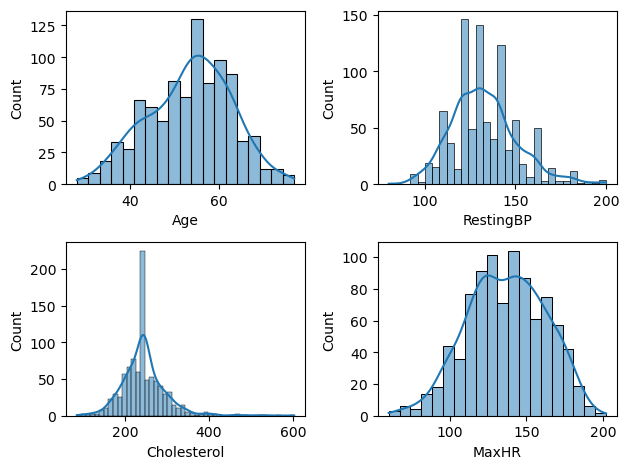

In [48]:
def plots(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plots('Age',1)
plots('RestingBP',2)
plots('Cholesterol',3)
plots('MaxHR',4)

plt.tight_layout()


In [50]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'is_patient'],
      dtype='object')

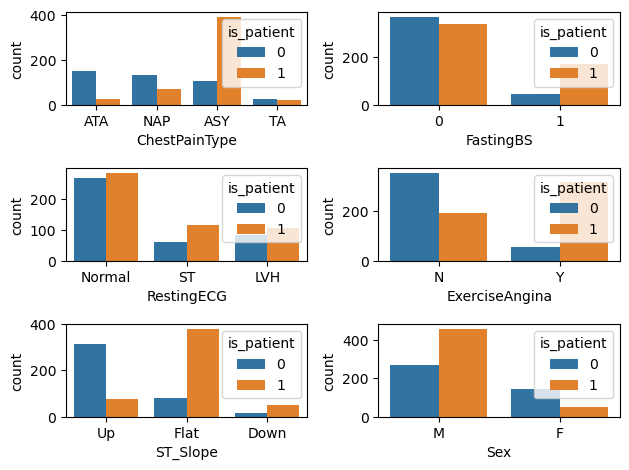

In [57]:
def plotcat(var, num):
    plt.subplot(3,2,num)
    sns.countplot(x =df[var], hue = df['is_patient'])

plotcat('ChestPainType', 1)
plotcat('FastingBS', 2)
plotcat('RestingECG', 3)
plotcat('ExerciseAngina', 4)
plotcat('ST_Slope', 5)
plotcat('Sex', 6)

plt.tight_layout()


<Axes: >

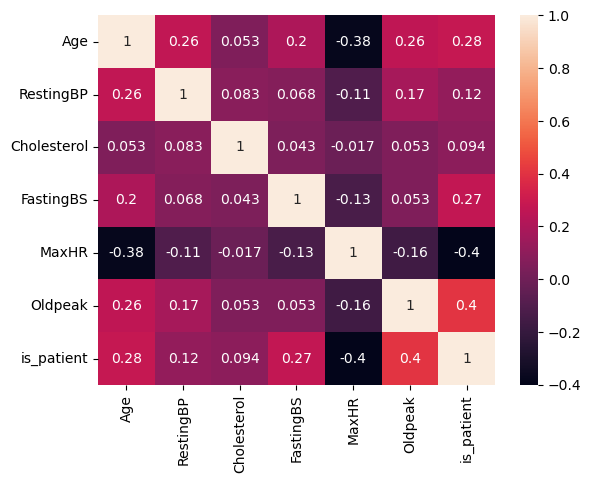

In [58]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [59]:
df_encode = pd.get_dummies(df,drop_first=True)

In [64]:
df_encode = df_encode.astype(int)
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,is_patient,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [65]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'RestingBP','Cholesterol','MaxHR','Oldpeak']
scalar = StandardScaler()
df_encode[numeric_cols] = scalar.fit_transform(df_encode[numeric_cols])
df_encode.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,is_patient,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [66]:
correlations = df_encode.corr()['is_patient'].sort_values(ascending=False)

print(correlations)

is_patient           1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.392385
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.117909
RestingECG_ST        0.102527
Cholesterol          0.092586
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: is_patient, dtype: float64
